In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

*Goal: we have a signal embedded in **high frequency noise** and we want to filter out the noise.*

To make matters simpler for now, let's assume that the signal is constant:

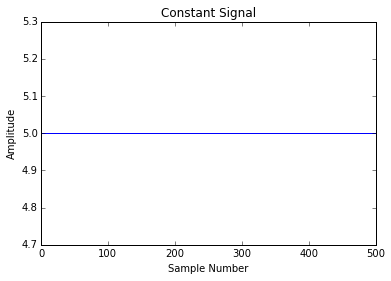

In [16]:
signal = np.ones(500)*5
plt.plot(signal)
plt.ylabel("Amplitude")
plt.xlabel("Sample Number")
plt.title('Constant Signal');

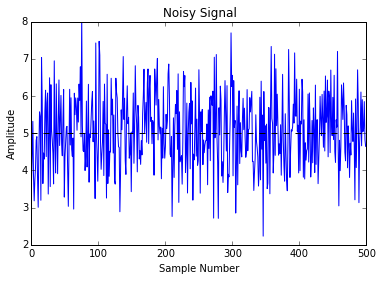

In [17]:
noisy_signal = signal + np.random.randn(500)
plt.plot(noisy_signal)
plt.plot(signal,'k--')
plt.ylim([2,8])
plt.ylabel("Amplitude")
plt.xlabel("Sample Number")
plt.title('Noisy Signal');

An intuitive way to recover the original signal is just to **average** the noisy signal. Let's see what that gives us.

In [18]:
avg_signal = np.mean(noisy_signal)
print("Estimated Original Signal: ",avg_signal)

Estimated Original Signal:  5.06017903014


We can think of the constant signal as a very low-frequency signal. In that sense, this average worked as a low-pass filter. 

Now lets consider a more interesting case where the signal is not constant, but still has a lower frequency than the noise. If we again average the whole signal, we will lose all the information contained in the signal. To avoid that issue, we instead use a moving average, giving us a **moving average filter**. The length $n$ moving average filter produces an output where each sample is the average of the last $n$ points of the input signal.

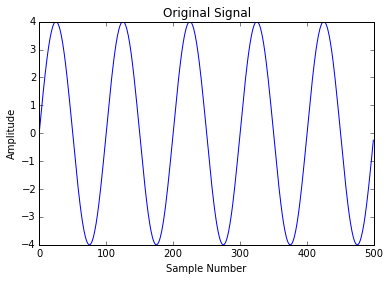

In [19]:
signal = 4*np.sin(np.arange(0,10*np.pi,10*np.pi/500))
plt.plot(signal)
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title('Original Signal');

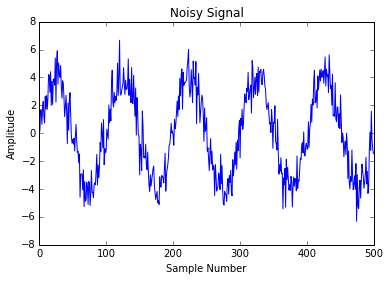

In [20]:
noisy_signal = signal + np.random.randn(len(signal))
plt.plot(noisy_signal)
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title('Noisy Signal');

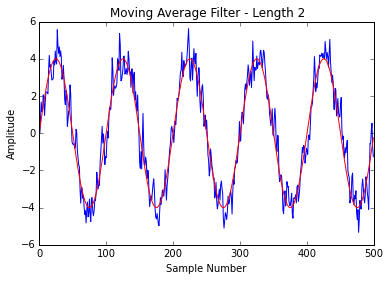

In [21]:
filtered_signal = np.zeros_like(noisy_signal)
num_avg = 2
for i in range(num_avg,len(noisy_signal)):
    for j in range(num_avg):
        filtered_signal[i] = filtered_signal[i] + noisy_signal[i-j]/num_avg
        
plt.plot(filtered_signal)
plt.plot(signal,'r')
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Moving Average Filter - Length "+str(num_avg));

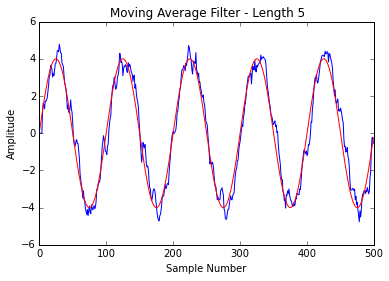

In [22]:
filtered_signal = np.zeros_like(noisy_signal)
num_avg = 5
for i in range(num_avg,len(noisy_signal)):
    for j in range(num_avg):
        filtered_signal[i] = filtered_signal[i] + noisy_signal[i-j]/num_avg     

plt.plot(filtered_signal)
plt.plot(signal,'r')
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Moving Average Filter - Length "+str(num_avg));

With the length 5 moving average filter, we can begin to see the noisy signal being smoothed out. Let's see the effect of using a *much* longer filter...

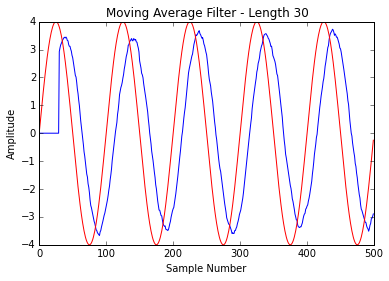

In [23]:
filtered_signal = np.zeros_like(noisy_signal)
num_avg = 30
for i in range(num_avg,len(noisy_signal)):
    for j in range(num_avg):
        filtered_signal[i] = filtered_signal[i] + noisy_signal[i-j]/num_avg
        

plt.plot(filtered_signal)
plt.plot(signal,'r')
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Moving Average Filter - Length "+str(num_avg));

At this point we can see that the shape of the original signal is almost perfectly recovered, although there is a time offset! This can be explained by the fact that each sample in the output uses only samples from the *past* in the input. To mitigate this, let's try having the output sample be the index for the *center* of the average:

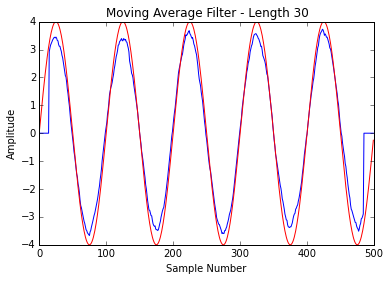

In [26]:
filtered_signal = np.zeros_like(noisy_signal)
num_avg = 30
for i in range(num_avg//2,len(noisy_signal)-num_avg//2):
    for j in range(-num_avg//2,num_avg//2):
        filtered_signal[i] = filtered_signal[i] + noisy_signal[i-j]/num_avg
        

plt.plot(filtered_signal)
plt.plot(signal,'r')
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Moving Average Filter - Length "+str(num_avg));